# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


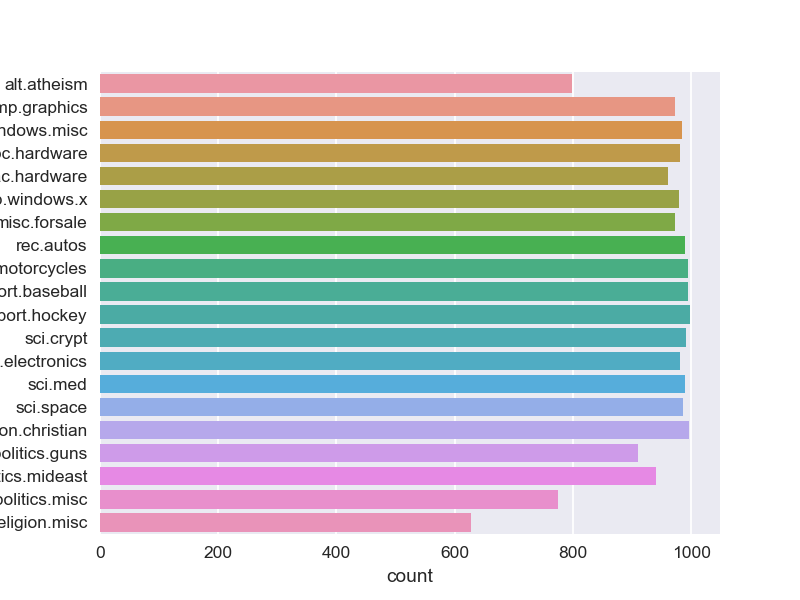

In [0]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [0]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [0]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [0]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [0]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [0]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import re
import nltk
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense,Input,Activation, Dropout, Embedding, Conv1D, Concatenate, MaxPool1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
import datetime

In [2]:
path = "documents/"

In [3]:
#https://www.geeksforgeeks.org/extracting-email-addresses-using-regular-expressions-python/
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    #Email
    preprocessed_email = []
    e_mail_list = re.findall(r'\S+@\S+', Input_Text)
    for e_mail in e_mail_list:
        e_mail_second_part = e_mail.split('@')[1]
        e_mail_remove_dot = e_mail_second_part.split('.')
        for i in e_mail_remove_dot:
            if len(i)<=2:
                e_mail_remove_dot.remove(i)
        if 'com' in e_mail_remove_dot:
            e_mail_remove_dot.remove(r'com')
        if 'com>' in e_mail_remove_dot:
            e_mail_remove_dot.remove(r'com>')   #sometimes .com ends with the character '>'
        e_mail_final = '_'.join(e_mail_remove_dot)
        e_mail_final = re.sub(r'>', '',e_mail_final)   #sometimes email address ends with the character '>'
        preprocessed_email.append(e_mail_final)
    Input_Text = re.sub(r'\S+@\S+', ' ' , Input_Text)
    
    #Subject
    subject_list = re.findall(r'Subject:.*', Input_Text)   #Subject ends with a newline character. So, we can match with all '.'
    
    subject_list = str(subject_list).split(':')[-1]
    subject_list = re.sub(r'\\.?', ' ', subject_list)
    preprocessed_subject = re.sub(r'[^A-Za-z0-9]',' ', subject_list)
    preprocessed_subject = re.sub(r' +',' ',preprocessed_subject)   # Removing extra spaces
    preprocessed_subject = preprocessed_subject.lower()
    
    Input_Text = re.sub(r'Subject:.*', ' ', Input_Text)
    
    #Removing certain parts of text
    
    Input_Text = re.sub(r'From:.*', ' ', Input_Text)        # Removing the sentence that starts with From:
        
    Input_Text = re.sub(r'Write to:.*', ' ', Input_Text)     # Removing the sentence that starts with Write to:
                                                              
        
    Input_Text = re.sub(r'<.*?>', ' ', Input_Text)                  
    
    Input_Text = re.sub(r'\(.*?\)', ' ', Input_Text)      
    
    
    Input_Text = re.sub(r'\s.*?:', ' ', Input_Text)
    
    #Decontraction code taken from Donor Choose dataset code
    Input_Text = re.sub(r"won't", "will not", Input_Text)
    Input_Text = re.sub(r"can\'t", "can not", Input_Text)
    Input_Text = re.sub(r"n\'t", " not", Input_Text)
    Input_Text = re.sub(r"\'re", " are", Input_Text)
    Input_Text = re.sub(r"\'s", " is", Input_Text)
    Input_Text = re.sub(r"\'d", " would", Input_Text)
    Input_Text = re.sub(r"\'ll", " will", Input_Text)
    Input_Text = re.sub(r"\'t", " not", Input_Text)
    Input_Text = re.sub(r"\'ve", " have", Input_Text)
    Input_Text = re.sub(r"\'m", " am", Input_Text)
    
    Input_Text = re.sub(r'[\n\t\-\\]',' ',Input_Text)
    
    #Chunking
    #Code is taken from https://classroom.appliedroots.com/v2/faqs/amO3NN9p/
    words = nltk.word_tokenize(Input_Text)

    tagged = nltk.pos_tag(words)
    chunks = list(nltk.ne_chunk(tagged))
    
    person = []

    for chunk in chunks:
        if hasattr(chunk, 'label'):
            if chunk.label() == 'PERSON':
                if type(chunk) is nltk.Tree:
                    t = ' '.join(c[0] for c in chunk.leaves())
                    person.append(t)
            if chunk.label() == 'GPE':
                if type(chunk) is nltk.Tree:
                    p = ' '.join(c[0] for c in chunk.leaves())
                    changed = '_'.join(c[0] for c in chunk.leaves())
                    Input_Text = Input_Text.replace(p,changed)
    
    person = sorted(person, key = len, reverse = True)
    for i in range(len(person)):
        Input_Text = Input_Text.replace(person[i],' ')    # Removing the larger names first so that incase there is a name
                                                          # mentioned twice as full_name( first_name last_name) and another
                                                          # time as just last_name, they are both deleted otherwise
                                                          # last_name will be deleted first and the full_name will just become
                                                          # first_name and if this first_name does not have label == person, it
                                                          # will not be deleted
    
    #Removing digits
    Input_Text = re.sub(r'\d',' ', Input_Text)
    
    #Removing words like _word, word_, _word_
    Input_Text = re.sub(r'\s_[A-Za-z]+\s', ' ', Input_Text)
    Input_Text = re.sub(r'\s_[A-Za-z]+_\s', ' ', Input_Text)
    Input_Text = re.sub(r'\s[A-Za-z]+_\s', ' ', Input_Text)
    
    #Removing words like d_berline and de_berlin
    oneletter_word = re.findall(r'\b[A-Za-z]_[A-Za-z]+', Input_Text)            # \b denotes beginning of a word
    twoletter_word = re.findall(r'\b[A-Za-z][A-Za-z]_[A-Za-z]+', Input_Text)
    for i in oneletter_word:
        Input_Text = re.sub(i,i.split('_')[1], Input_Text)
    for i in twoletter_word:
        Input_Text = re.sub(i,i.split('_')[1], Input_Text)
        
    Input_Text= Input_Text.lower()
    
    #https://stackoverflow.com/questions/24332025/remove-words-of-length-less-than-4-from-string
    Input_Text = re.sub(r'\b\w{1,2}\b', '', Input_Text)
    Input_Text = re.sub(r'\b\w{15,}\b', '', Input_Text)
    preprocessed_text = re.sub(r'[^A-Za-z_\s]','', Input_Text)
    
    #Remove extra spaces
    preprocessed_text = re.sub(r' +',' ',preprocessed_text)
    
    return (preprocessed_email,preprocessed_subject,preprocessed_text)

In [4]:
with open(path+'alt.atheism_49960.txt',encoding = 'ISO-8859-1') as f:
    text = f.read()
    print(preprocess(text))
    

(['mantis_uk', 'netcom', 'mantis_uk'], ' atheist resources ', ' atheismresources resources december atheist resources addresses atheist organizations usa freedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the evolution designs evolution designs sell the fish fish symbol like the ones stick their cars but with feet and the word written inside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get from try mailing for net people who directly the price per fish american atheist press aap publish various atheist books critiques the bible lists the bible handbook and american atheist press isbn edition bible contradictions the bible contradicts itself aap based the king version the bible austin prometheus books sell books including holy horrors prometheus books african americans for humanism organization promoting black secular humanism and uncovering the histo

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

In [5]:
if not os.path.isfile('preprocessed_data.csv'):
    preprocessed_email_list = []
    preprocessed_subject_list = []
    preprocessed_text_list = []
    text_list = []
    class_label = []
    doc_num=[]
    for file in tqdm(os.listdir(path)):
        label, _ = file.split('_')
        class_label.append(label)
        with open(path+file,encoding = 'ISO-8859-1') as f:
            text = f.read()
            text_list.append(text)
            email , subject , pre_text = preprocess(text)
            preprocessed_email_list.append(email)
            preprocessed_subject_list.append(subject)
            preprocessed_text_list.append(pre_text)
            
    #https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
    
    data = pd.DataFrame({'text':text_list,'class':class_label,'processed_email': preprocessed_email_list, 
                         'processed_subject': preprocessed_subject_list, 'processed_text':preprocessed_text_list})
    data.to_csv('preprocessed_data.csv', index = False)
else:
    print('preprocessed_data.csv already exists')



preprocessed_data.csv already exists


In [6]:
data = pd.read_csv('preprocessed_data.csv')

In [7]:
data.head()

,text,class,processed_email,processed_subject,processed_text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,"['mantis_uk', 'netcom', 'mantis_uk']",atheist resources,atheismresources resources december atheist r...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,"['mantis_uk', 'mantis_uk', 'mantis_uk']",introduction to atheism,atheismintroduction introduction april egin p...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,"['dbstu1_tu-bs', 'mimsy_umd_edu', 'umd_edu']",gospel dating,article well has quite different not necessar...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,"['mantis_uk', 'kepler_unh_edu']",university violating separation of church state,recently ras have been ordered and none have ...
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,"['Watson_Ibm_Com', 'harder_ccr-p_ida_org,', 'h...",soc motss et al princeton axes matching funds...,however hate economic terrorism and political...


In [8]:
data.shape

(18828, 5)

In [9]:
data.columns

Index(['text', 'class', 'processed_email', 'processed_subject',
       'processed_text'],
      dtype='object')

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

In [10]:
data['final_text'] = data['processed_email'].astype(str) +" "+ data['processed_subject'].astype(str) \
                     + " "+ data['processed_text'].astype(str)

In [11]:
data.head()

,text,class,processed_email,processed_subject,processed_text,final_text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,"['mantis_uk', 'netcom', 'mantis_uk']",atheist resources,atheismresources resources december atheist r...,"['mantis_uk', 'netcom', 'mantis_uk'] atheist ..."
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,"['mantis_uk', 'mantis_uk', 'mantis_uk']",introduction to atheism,atheismintroduction introduction april egin p...,"['mantis_uk', 'mantis_uk', 'mantis_uk'] intro..."
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,"['dbstu1_tu-bs', 'mimsy_umd_edu', 'umd_edu']",gospel dating,article well has quite different not necessar...,"['dbstu1_tu-bs', 'mimsy_umd_edu', 'umd_edu'] ..."
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,"['mantis_uk', 'kepler_unh_edu']",university violating separation of church state,recently ras have been ordered and none have ...,"['mantis_uk', 'kepler_unh_edu'] university vi..."
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,"['Watson_Ibm_Com', 'harder_ccr-p_ida_org,', 'h...",soc motss et al princeton axes matching funds...,however hate economic terrorism and political...,"['Watson_Ibm_Com', 'harder_ccr-p_ida_org,', 'h..."


In [12]:
X = data['final_text']
y = data['class']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.25 , stratify = y)

In [14]:
#https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')  # Removed '_' from filters
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [15]:
length = []
for i in train_sequences:
    length.append(len(i))
print('95 percent of data has sequence length lesser than',np.percentile(length,95))

95 percent of data has sequence length lesser than 503.0


So we can pad the data with max length 502

In [16]:
#https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a
padded_train_sequences=pad_sequences(train_sequences,padding="post",truncating="post",maxlen=502)
padded_test_sequences=pad_sequences(test_sequences,padding="post",truncating="post",maxlen=502)

In [17]:
num_class_labels = LabelEncoder()      # to_categorical method needs the input to be in numerical format. So, we use
num_class_labels.fit(y_train)          # LabelEncoder to convert our classes into numerical labels
y_train = num_class_labels.transform(y_train)
y_test = num_class_labels.transform(y_test)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=20) 
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=20)

In [18]:
vocab = tokenizer.word_index
#https://datascience.stackexchange.com/questions/93651/reason-for-adding-1-to-word-index-for-sequence-modeling
vocab_size = len(vocab)+1 # word_index starts with index 1. Last word in word_index has index = len(vocab)
                          # Normally index always starts at zero. So, to access the last word in word_index
                          # we need to specify vocab_size = len(vocab) + 1

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [19]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

embeddings_index = dict()
f = open('glove.6B.300d.txt', encoding ='utf-8')      
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [20]:
embedding_matrix = np.zeros((vocab_size, 300))  # We used 300d glove word embedding version
for word, i in vocab.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [30]:

input_layer = Input(shape=(len(padded_train_sequences[0]),))
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 300, weights = [embedding_matrix], 
                            input_length=len(padded_train_sequences[0]), trainable=False) (input_layer) # We used 300d 
                                                                                                        # glove vector

conv1 = Conv1D(16, 3, activation = 'relu', kernel_initializer='HeUniform') (embedding_layer)
conv2 = Conv1D(16, 4, activation = 'relu', kernel_initializer='HeUniform') (embedding_layer)
conv3 = Conv1D(16, 5, activation = 'relu', kernel_initializer='HeUniform') (embedding_layer)

concatenate1 = Concatenate(axis=1)([conv1,conv2,conv3])

maxpool1 = MaxPool1D(2) (concatenate1)

conv4 = Conv1D(16, 6, activation = 'relu', kernel_initializer='HeUniform') (maxpool1)
conv5 = Conv1D(16, 7, activation = 'relu', kernel_initializer='HeUniform') (maxpool1)
conv6 = Conv1D(16, 8, activation = 'relu', kernel_initializer='HeUniform') (maxpool1)

concatenate2 = Concatenate(axis=1)([conv4,conv5,conv6])

maxpool2 = MaxPool1D(2) (concatenate2)

conv7 = Conv1D(16, 3, activation = 'relu', kernel_initializer='HeUniform') (maxpool2)

flatten = Flatten() (conv7)

dropout = Dropout(0.5) (flatten)

dense1 = Dense(128,activation='relu', kernel_initializer='HeUniform')(dropout)
dense2 = Dense(256,activation='relu', kernel_initializer='HeUniform')(dense1)

output = Dense(20,activation='softmax')(dense2)

model_one = Model(inputs=input_layer,outputs=output)
model_one.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 502)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 502, 300)     27780300    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 500, 16)      14416       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 499, 16)      19216       embedding[0][0]                  
______________________________________________________________________________________________

In [31]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [32]:
filepath="model_save/best_model_one.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2, verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) \
                       ,histogram_freq=1,write_graph=True)

call_back_list = [ earlystop, checkpoint, tensorboard_callback]

In [33]:
model_one.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model_one.fit(padded_train_sequences,Y_train,epochs=25, validation_data=(padded_test_sequences,Y_test), batch_size=512, callbacks=[call_back_list])

Epoch 1/25
28/28 [==============================] - 7s 220ms/step - loss: 2.8887 - accuracy: 0.1045 - val_loss: 2.4559 - val_accuracy: 0.1882

Epoch 00001: val_accuracy improved from -inf to 0.18823, saving model to model_save\best_model_one.hdf5
Epoch 2/25
28/28 [==============================] - 5s 167ms/step - loss: 2.0236 - accuracy: 0.3047 - val_loss: 1.6005 - val_accuracy: 0.4572

Epoch 00002: val_accuracy improved from 0.18823 to 0.45719, saving model to model_save\best_model_one.hdf5
Epoch 3/25
28/28 [==============================] - 5s 166ms/step - loss: 1.3221 - accuracy: 0.5427 - val_loss: 1.2220 - val_accuracy: 0.5798

Epoch 00003: val_accuracy improved from 0.45719 to 0.57977, saving model to model_save\best_model_one.hdf5
Epoch 4/25
28/28 [==============================] - 5s 166ms/step - loss: 0.9597 - accuracy: 0.6714 - val_loss: 0.9995 - val_accuracy: 0.6652

Epoch 00004: val_accuracy improved from 0.57977 to 0.66518, saving model to model_save\best_model_one.hdf5
Epo

#### Our final validation accuracy is 75.37% after 9 epochs

In [34]:
%tensorboard --logdir logs/fits

### Model one Accuracy and loss in Tensorboard

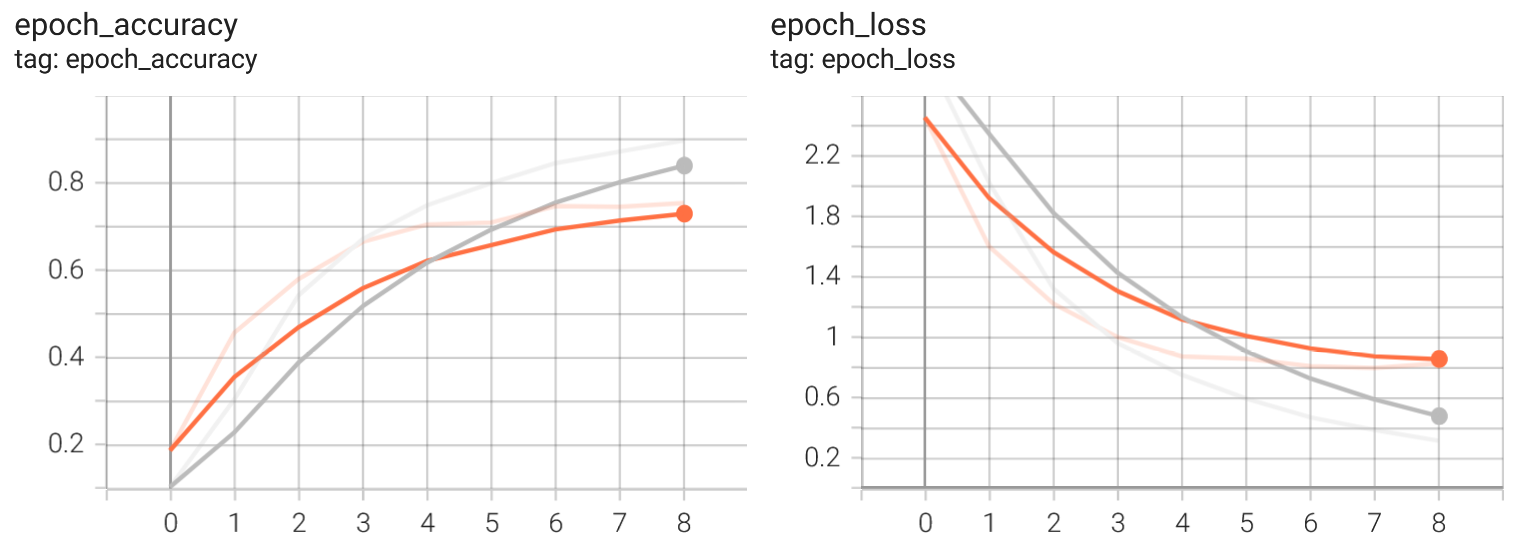

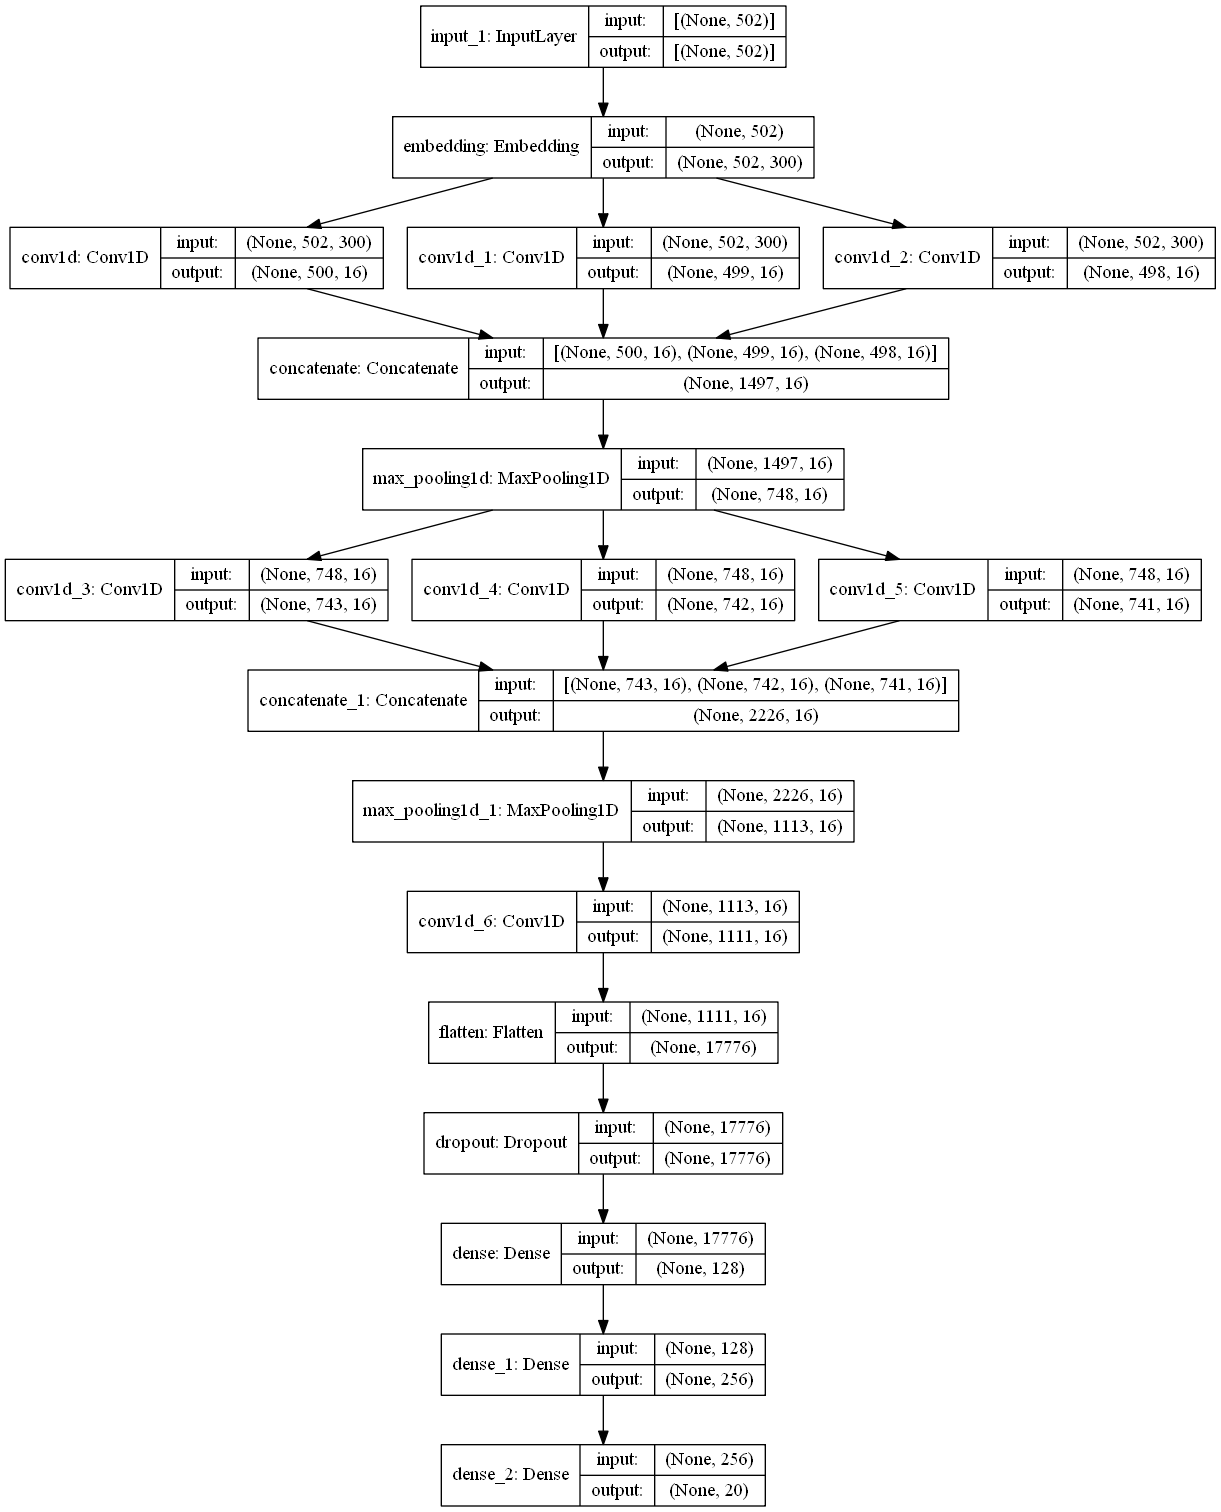

In [35]:
plot_model(model_one, to_file='model_one.png', show_shapes=True)

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [36]:
#https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/
tokenizer = Tokenizer(char_level = True, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')  # Removed '_' from filters
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [72]:
length = []
for i in train_sequences:
    length.append(len(i))
max_length = int(np.percentile(length,95))
print('95 percent of data has sequence length lesser than',max_length)

95 percent of data has sequence length lesser than 3222


So we can pad the data with max length 3222

In [73]:
#https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a
padded_train_sequences=pad_sequences(train_sequences,padding="post",truncating="post",maxlen=max_length)
padded_test_sequences=pad_sequences(test_sequences,padding="post",truncating="post",maxlen=max_length)

In [74]:
vocab = tokenizer.word_index
#https://datascience.stackexchange.com/questions/93651/reason-for-adding-1-to-word-index-for-sequence-modeling
vocab_size = len(vocab)+1 # word_index starts with index 1. Last word in word_index has index = len(vocab)
                          # Normally index always starts at zero. So, to access the last word in word_index
                          # we need to specify vocab_size = len(vocab) + 1

In [75]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

embeddings_index = dict()
f = open('glove.840B.300d-char.txt', encoding ='utf-8')      
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 94 word vectors.


In [76]:
embedding_matrix = np.zeros((vocab_size, 300))  # We used 300d glove word embedding version
for word, i in vocab.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [102]:
input_layer_2 = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 300, weights = [embedding_matrix], 
                            input_length=max_length, trainable=False) (input_layer_2) # We used 300d 
                                                                                                        # glove vector

conv1 = Conv1D(16, 3, activation = 'relu', kernel_initializer='HeUniform') (embedding_layer)
conv2 = Conv1D(16, 4, activation = 'relu', kernel_initializer='HeUniform') (conv1)

maxpool1 = MaxPool1D(2) (conv2)

conv3 = Conv1D(16, 5, activation = 'relu', kernel_initializer='HeUniform') (maxpool1)
conv4 = Conv1D(16, 6, activation = 'relu', kernel_initializer='HeUniform') (conv3)

maxpool2 = MaxPool1D(2) (conv4)

flatten = Flatten() (maxpool2)

dropout = Dropout(0.5) (flatten)

dense1 = Dense(128,activation='relu', kernel_initializer='HeUniform')(dropout)
dense2 = Dense(256,activation='relu', kernel_initializer='HeUniform')(dense1)

output_2 = Dense(20,activation='softmax')(dense2)

model_two = Model(inputs=input_layer_2,outputs=output_2)
model_two.summary()


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 3222)]            0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 3222, 300)         21000     
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 3220, 16)          14416     
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 3217, 16)          1040      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 1608, 16)          0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 1604, 16)          1296      
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 1599, 16)          155

In [103]:
filepath="model_save/best_model_two.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=2, verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) \
                       ,histogram_freq=1,write_graph=True)

call_back_list = [ earlystop, checkpoint, tensorboard_callback]

In [104]:
model_two.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model_two.fit(padded_train_sequences,Y_train,epochs=25, validation_data=(padded_test_sequences,Y_test), batch_size=128, callbacks=[call_back_list])

Epoch 1/25
111/111 [==============================] - 11s 92ms/step - loss: 2.9385 - accuracy: 0.0778 - val_loss: 2.9182 - val_accuracy: 0.0877

Epoch 00001: val_accuracy improved from -inf to 0.08774, saving model to model_save\best_model_two.hdf5
Epoch 2/25
111/111 [==============================] - 9s 80ms/step - loss: 2.9008 - accuracy: 0.0960 - val_loss: 2.8761 - val_accuracy: 0.1001

Epoch 00002: val_accuracy improved from 0.08774 to 0.10006, saving model to model_save\best_model_two.hdf5
Epoch 3/25
111/111 [==============================] - 9s 78ms/step - loss: 2.8001 - accuracy: 0.1321 - val_loss: 2.8465 - val_accuracy: 0.1181

Epoch 00003: val_accuracy improved from 0.10006 to 0.11812, saving model to model_save\best_model_two.hdf5
Epoch 4/25
111/111 [==============================] - 9s 79ms/step - loss: 2.6405 - accuracy: 0.1870 - val_loss: 2.9022 - val_accuracy: 0.1139

Epoch 00004: val_accuracy did not improve from 0.11812
Epoch 5/25
111/111 [==============================

#### Our final validation accuracy is 11.81% after 5 epochs

### Model Two Accuracy and loss in Tensorboard

In [109]:
!tensorboard --logdir logs/fits

^C


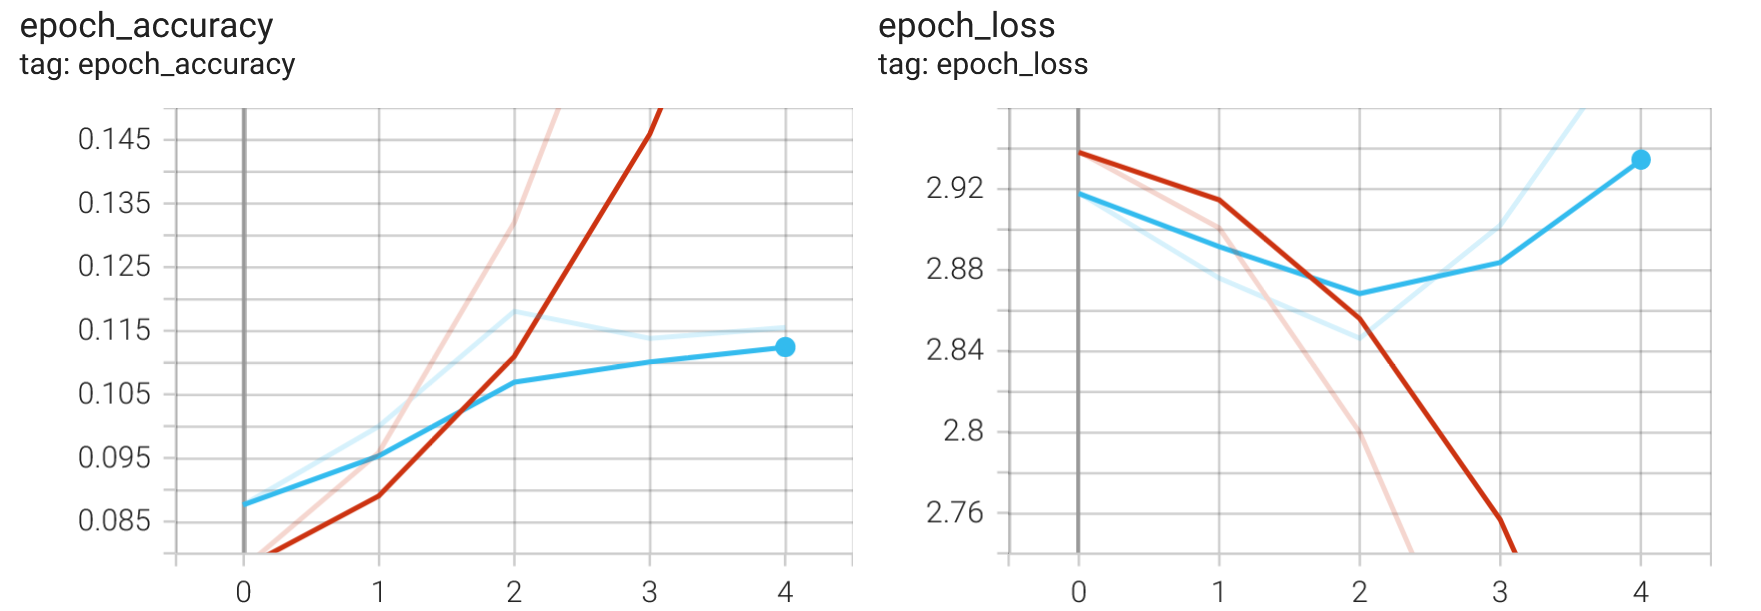

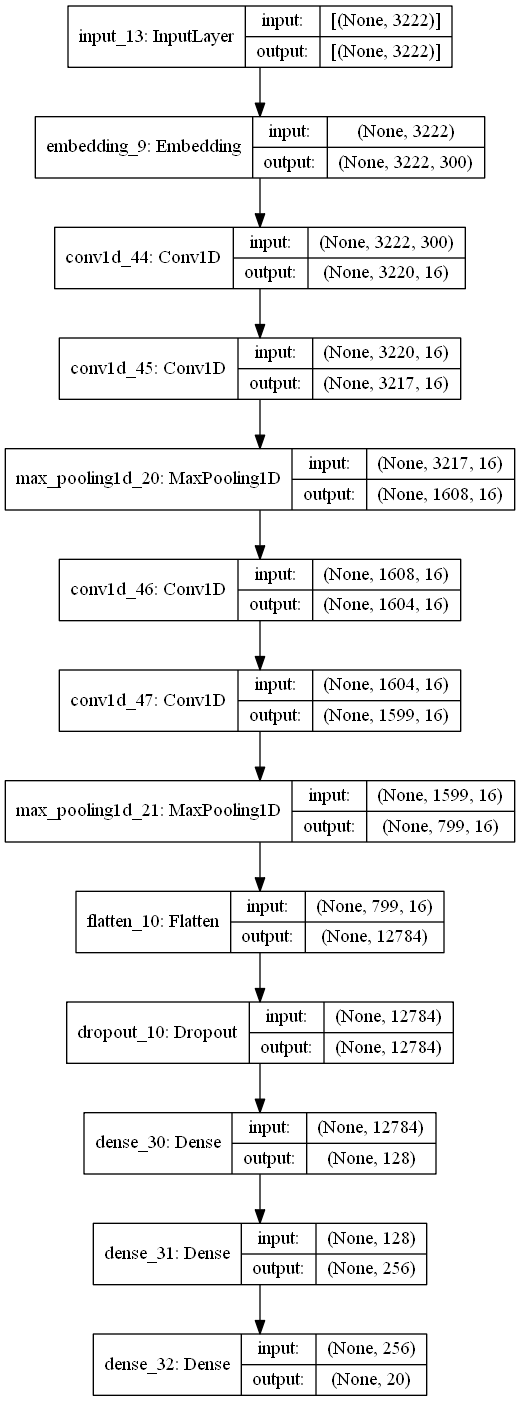

In [105]:
plot_model(model_two, to_file='model_two.png', show_shapes=True)